# Experimento #4
## LDR

### Nome: João Vitor Rodrigues Baptista
### Matricula: 15/0013329

Objetivo: Introdução ao comportamento de um LDR (“Light Dependent Resistor”), com a obtenção da sua curva I-V característica, em função da intensidade de luz incidente, obtida a partir de um LED.

Importando os dados

In [112]:
dict_data_1 = {
    'Vr2[V]': [1.018, 2.00, 3.02, 4.02, 5.00, 6.02, 7.03],
    'Iled[A]': [1.051*(10**-3), 2.07*(10**-3), 3.10*(10**-3), 4.15*(10**-3), 5.16*(10**-3), 6.22*(10**-3), 7.26*(10**-3)],
    'Rldr[ohns]': [796, 540, 449, 396, 347, 330, 300]
}

r1 = 983
r2 = 968

In [162]:
dict_data_2 = {
    'V2(alvo)[V]': [3, 4, 5, 6, 7, 8, 9, 10],
    'V2[V]': [3.00, 4.01, 5.01, 6.01, 7.03, 8.02, 9.00, 10.00],
    'Vr2[V]': [0.460, 1.395, 2.34, 3.30, 4.29, 5.24, 6.18, 7.15],
    'Vr1[V]': [5.27, 6.82, 7.55, 8.04, 8.37, 8.56, 8.79, 8.93]
}

v1 = 12.10

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1) No circuito da Figura-1, com um multímetro no modo ohmímetro e outro no modo voltímetro medindo V R2 , meça a resistência R LDR em função da corrente I LED . Plote R LDR vs. I LED e ajuste a curva do modelo proposto.

In [164]:
data_df_1 = pd.DataFrame.from_dict(dict_data_1)
data_df_1.head()

,Vr2[V],Iled[A],Rldr[ohns]
0,1.018,0.001051,796
1,2.000,0.002070,540
2,3.020,0.003100,449
3,4.020,0.004150,396
4,5.000,0.005160,347


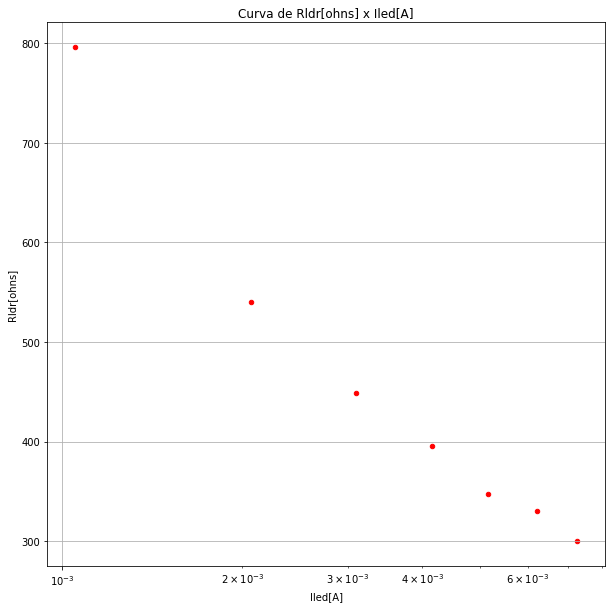

In [165]:
data_df_1.plot(kind='scatter',x='Iled[A]',y='Rldr[ohns]',color='red', grid=True, title='Curva de Rldr[ohns] x Iled[A]', legend=True, figsize=(10,10), logx=True )
plt.show()

Ajustando curva

In [166]:
g1 = np.sqrt(data_df_1['Iled[A]'].values)
g2 = np.ones(len(data_df_1))
a11 = np.sum(g1*g1)
a12 = np.sum(g1*g2)
a21 = np.sum(g2*g1)
a22 = np.sum(g2*g2)
b1 = np.sum((1/data_df_1['Rldr[ohns]'].values)*g1)
b2 = np.sum((1/data_df_1['Rldr[ohns]'].values)*g2)

In [167]:
A =  np.array([[a11, a12],[a21, a22]])
B =  np.array([b1, b2])
C = np.linalg.solve(A, B)

In [168]:
print('Onde C é: ', C)

Onde C é:  [3.84807513e-02 5.83514282e-05]


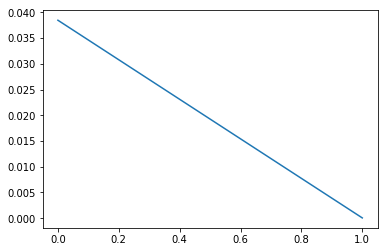

In [169]:
plt.plot(C)
plt.show()

In [170]:
Iledc = np.linspace(min(data_df_1['Iled[A]']), max(data_df_1['Iled[A]']), num=100)

In [171]:
Gldrc = C[0]*np.sqrt(Iledc) + C[1]

In [172]:
Rldrc = 1/Gldrc

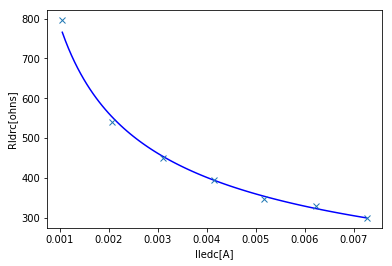

In [173]:
plt.plot(Iledc, Rldrc,'b', data_df_1['Iled[A]'], data_df_1['Rldr[ohns]'], 'x')
plt.xlabel('Iledc[A]')  
plt.ylabel('Rldrc[ohns]') 
plt.show()

In [174]:
Gldr0 = C[0]*np.sqrt(data_df_1['Iled[A]'].values)+C[1]
Rldr0 = 1/Gldr0

In [175]:
EQMP = 100*(1/len(data_df_1))*np.sum(((data_df_1['Rldr[ohns]'].values - Rldr0)/data_df_1['Rldr[ohns]'].values)**2)

In [176]:
print('O erro medio quadrado é dado por: ', EQMP)

O erro medio quadrado é dado por:  0.043160758784285415


Como o erro percentual quadradico médio é proximo de 0 o resultado é muito aceitavel

#### 2) No circuito da Figura-2 a tensão da fonte V 1 permanece constante. Varie a tensão da fonte V 2 de 0V até 10V. Meça as tensões V 2 , V R2 e V R1 . Calcule os outros valores preenchendo toda a tabela, usando a quantidade correta de dígitos significativos.

Como o erro quadratico médio é bem proximo de 0 podemos considerar o ajuste muito bom.

Para fazer o preenchimento dos restantes dos dados será utilizados as seguintes formulas:

$$ I_{LED} = I_{2} = \frac{V_{R2}}{R_{2}} $$ 


$$ V_{LDR} = V_{1} - V[R1] $$ 


$$ I_{LDR} = I_{1} = \frac{V_{R1}}{R_{1}} $$ 


$$ G_{LDR} = I_{1} = \frac{I_{LDR}}{V_{LDR}} $$ 

Com modelo de aproximação

$$ G_{LDR} = C_{1} \sqrt{I_{LED}} + C_{2} $$ 


In [177]:
data_df_2 = pd.DataFrame.from_dict(dict_data_2)
data_df_2.head()

,V2(alvo)[V],V2[V],Vr2[V],Vr1[V]
0,3,3.00,0.460,5.27
1,4,4.01,1.395,6.82
2,5,5.01,2.340,7.55
3,6,6.01,3.300,8.04
4,7,7.03,4.290,8.37


In [178]:
def calculo_f(row, v1, r1, r2):
    '''Função para fazer o preenchimento dos dados completo da tabela'''
    try:
        Iled = row['Vr2[V]']/r2
        
        Vldr = v1 - row['Vr1[V]']
        
        Ildr = row['Vr1[V]']/r1
        
        Gldr = Ildr/Vldr

        row['Iled[A]'] = Iled
        row['Vldr[V]'] = Vldr
        row['Ildr[A]'] = Ildr
        row['Gldr[S]'] = Gldr
    
    except ZeroDivisionError:
        row['Iled[A]'] = 0
        row['Vldr[V]'] = 0
        row['Ildr[A]'] = 0
        row['Gldr[S]'] = 0
    
    return row

In [179]:
data_df_2 = data_df_2.apply(lambda row : calculo_f(row, v1, r1, r2), axis = 1)

In [181]:
data_df_2

,V2(alvo)[V],V2[V],Vr2[V],Vr1[V],Iled[A],Vldr[V],Ildr[A],Gldr[S]
0,3.0,3.00,0.460,5.27,0.000475,6.83,0.005361,0.000785
1,4.0,4.01,1.395,6.82,0.001441,5.28,0.006938,0.001314
2,5.0,5.01,2.340,7.55,0.002417,4.55,0.007681,0.001688
3,6.0,6.01,3.300,8.04,0.003409,4.06,0.008179,0.002015
4,7.0,7.03,4.290,8.37,0.004432,3.73,0.008515,0.002283
5,8.0,8.02,5.240,8.56,0.005413,3.54,0.008708,0.002460
6,9.0,9.00,6.180,8.79,0.006384,3.31,0.008942,0.002702
7,10.0,10.00,7.150,8.93,0.007386,3.17,0.009084,0.002866


#### 2) Obtenha o gráfico de pontos experimentais para curva I x V AB . Onde I é a corrente que passa pelo filamento e V AB = (V A -V B ) é o potencial sobre a lâmpada.

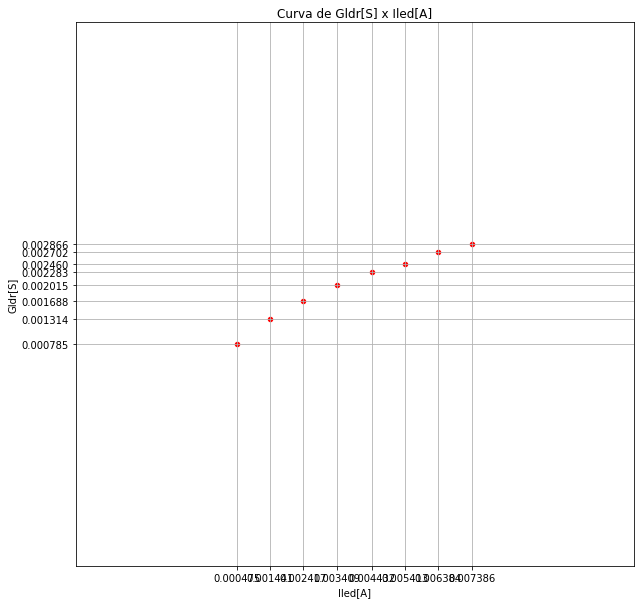

In [182]:
data_df_2.plot(kind='scatter',y='Gldr[S]',x='Iled[A]',color='red', grid=True, title='Curva de Gldr[S] x Iled[A]', legend=True, xticks=data_df_2['Iled[A]'], yticks=data_df_2['Gldr[S]'], figsize=(10,10) )
plt.show()

Ajustando curva

In [183]:
g1 = np.sqrt(data_df_2['Iled[A]'].values)
g2 = np.ones(len(data_df_2))
a11 = np.sum(g1*g1)
a12 = np.sum(g1*g2)
a21 = np.sum(g2*g1)
a22 = np.sum(g2*g2)
b1 = np.sum((data_df_2['Gldr[S]'].values)*g1)
b2 = np.sum((data_df_2['Gldr[S]'].values)*g2)

In [184]:
A =  np.array([[a11, a12],[a21, a22]])
B =  np.array([b1, b2])
C = np.linalg.solve(A, B)

In [185]:
print('Onde C é: ', C)

Onde C é:  [3.26306505e-02 8.33913578e-05]


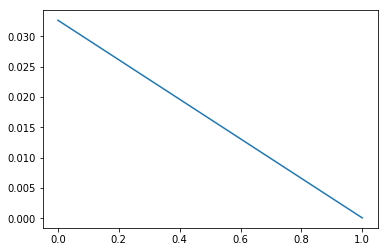

In [186]:
plt.plot(C)
plt.show()

In [188]:
Iledc = np.linspace(min(data_df_2['Iled[A]']), max(data_df_2['Iled[A]']), num=100)

Gldrc = C[0]*np.sqrt(Iledc) + C[1]

Rldrc = 1/Gldrc

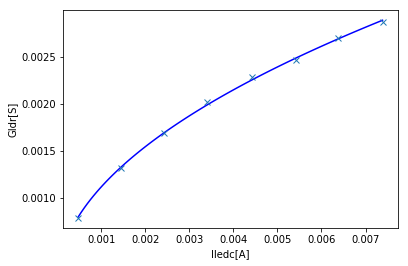

In [190]:
plt.plot(Iledc, Gldrc, 'b', data_df_2['Iled[A]'], data_df_2['Gldr[S]'], 'x')
plt.xlabel('Iledc[A]')  
plt.ylabel('Gldr[S]') 
plt.show()

In [192]:
Gldr0 = C[0]*np.sqrt(data_df_2['Iled[A]'].values)+C[1]
Rldr0 = 1/Gldr0

EQMP = 100*(1/len(data_df_2))*np.sum(((data_df_2['Gldr[S]'].values - Gldr0)/data_df_2['Gldr[S]'].values)**2)

print('O erro medio quadrado é dado por: ', EQMP)

O erro medio quadrado é dado por:  0.008408307287119735


Como o erro percentual quadradico médio é proximo de 0 o resultado é muito aceitavel, porem para melhorar ainda mais seria melhor uma fonte com menos variação e resistores melhores.

## 3)Pesquisa:

Encontre materiais que podem ser usados na construção de LDRs sensíveis à luz com comprimentos de onda na região do visível (400 nm >  > 700 nm). Comente se cada material encontrado é monocristalino, policristalino ou amorfo, ou ainda se é orgânico ou inorgânico, e cite as suas referências.

Os LDRs são fabricados com materiais de alta resistência, como por exemplo o Sulfeto de Cádmio (CdS) ou o Sulfeto de Chumbo (PbS). Esses materiais possuem poucos elétrons livres quando colocados em ambiente escuro, e liberam elétrons quando há incidência de luz sobre eles, aumentando sua condutividade. Chamamos a esse efeito de Fotocondutividade.

[Referência](http://www.bosontreinamentos.com.br/eletronica/curso-de-eletronica/curso-de-eletronica-o-que-e-um-ldr-light-dependent-resistor/#:~:text=Os%20LDRs%20s%C3%A3o%20fabricados%20com,sobre%20eles%2C%20aumentando%20sua%20condutividade.)

Sulfeto de cádmio -> Estrutura cristalina: Hexagonal